In [128]:
import numpy as np

"""
define your neural network. These parameters have to be initially declared.
N: input batch size, 
D_in: Input dimensions(here we have a total of 1000 input data)
D_out: Output labels  
H : number of hidden units. we have 10 here
"""
N, D_in, H, D_out = 64, 1000, 100, 10

#Create random input and output data

x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

#initialize random weights
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

#Define Learning rate to update weights
learning_rate = 1e-6

#We compute the gradients on complete bath rather than individual inputs
#run the loop for predefined epochs

for run in range(500):
    
    #Step:1 Forward pass
    h = x.dot(w1)
    #pass thru non linear activation function. Using RELU
    h_relu = np.maximum(h, 0)
    
    # compute the dot products to output layer. No activation here
    y_pred = h_relu.dot(w2)
    
    #Step2: Compute loss
    loss = np.square(y - y_pred).sum()
    print(run, loss)
    
    #step3: Gradient Descent: Back prop to compute gradients of w1 and w2
    grad_y_pred = 2 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    #update weights
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2
    
    
    

0 34290448.5965
1 34013043.8913
2 39752703.2273
3 44007288.6074
4 39309234.6843
5 25805835.8674
6 12663961.5928
7 5450797.20204
8 2578357.06602
9 1510919.82846
10 1064735.83284
11 831805.25261
12 681972.268218
13 571881.917995
14 485457.845153
15 415477.923803
16 357774.849264
17 309759.209116
18 269489.069626
19 235453.389524
20 206533.862207
21 181814.651354
22 160593.776831
23 142331.980066
24 126526.067365
25 112776.973496
26 100767.228023
27 90232.0401794
28 80975.349307
29 72817.2314724
30 65603.8119483
31 59218.4925391
32 53547.448089
33 48497.4091512
34 43996.4270849
35 39977.3410868
36 36398.5867285
37 33181.5662644
38 30287.0344392
39 27679.1396682
40 25322.6890745
41 23191.7050603
42 21260.9794739
43 19509.5556417
44 17918.1724742
45 16470.0924547
46 15151.4378727
47 13949.3158763
48 12852.24683
49 11849.9393535
50 10934.749779
51 10097.8368764
52 9331.72079281
53 8630.40200961
54 7987.25894844
55 7396.44872399
56 6853.09411103
57 6352.98106313
58 5892.65569319
59 5468.45132

# 2 layer neural using Tensors

In [129]:
import torch

dtype = torch.FloatTensor

"""
N is the batch size
D_in is the input dimension
D_out is the Output dimension. Number of expected labels
h is number of hidden units.
"""
N, D_in, D_out, H = 64, 1000, 10, 100

#create input and out put matrix

x = torch.randn(N, D_in).type(dtype)
y = torch.randn(N, D_out).type(dtype)

#initialise the weight vector

w1 = torch.randn(D_in, H).type(dtype)
w2 = torch.randn(H, D_out).type(dtype)

learning_rate = 1e-6

for t in range(1):
    h = x.mm(w1)
    h_relu = h.clamp(min = 0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    
    print(t, loss)
    
    #back prop
    
    grad_y_pred = 2 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_ypred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)

    # Update weights using gradient descent
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2


0 32298636.449946404


# Neural Network with pytorch variables - using autograd

In [130]:
from torch.autograd import Variable
import matplotlib.pyplot as plt

loss_arr = []

dtype = torch.FloatTensor

N, D_in, D_out, H = 64, 1000, 10, 100

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad = False)
y = Variable(torch.randn(N, D_out).type(dtype), requires_grad = False)

w1 = Variable(torch.randn(D_in, H).type(dtype), requires_grad = True)
w2 = Variable(torch.randn(H, D_out).type(dtype), requires_grad = True)

learning_rate = 1e-6
for i in range(500):
    h = x.mm(w1)
    h_relu = h.clamp(min = 0)
    y_pred = h_relu.mm(w2)
    
    loss = (y_pred - y).pow(2).sum()
    
    #print(i, loss.data[0])
    loss_arr.append(loss.data[0])
    loss.backward()
    
    
    w1.data = w1.data - learning_rate * w1.grad.data
    w2.data = w2.data - learning_rate * w2.grad.data
    
    w1.grad.data.zero_()
    w2.grad.data.zero_()

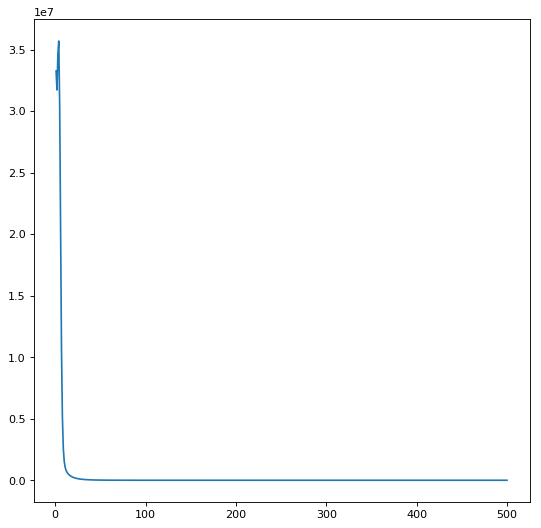

In [131]:
x = np.linspace(1, 500, 500)

y = loss_arr

plt.figure(figsize=(8,8), dpi = 80)
plt.plot(x, y)

plt.show()


# Neural Network Implementation using Pytorch nn package

In [132]:
import torch
from torch.autograd import Variable
import numpy as np

%matplotlib inline

loss_arr = []

dtype = torch.FloatTensor

N, D_in, D_out, H = 64, 1000, 10, 100

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad = False)
y = Variable(torch.randn(N, D_out), requires_grad = False)

model = torch.nn.Sequential(torch.nn.Linear(D_in, H, bias = True),
                            torch.nn.ReLU(),
                            torch.nn.Linear(H, D_out, bias=True)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4

for t in range(500):
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    #print(t, loss.data[0])
    loss_arr.append(loss.data[0])
    model.zero_grad()
    
    loss.backward()
    
    for param in model.parameters():
        #print(type(param.data), param.size())
        param.data -= learning_rate * param.grad.data
    
    #for b in model.bias:
     
        #print(b)

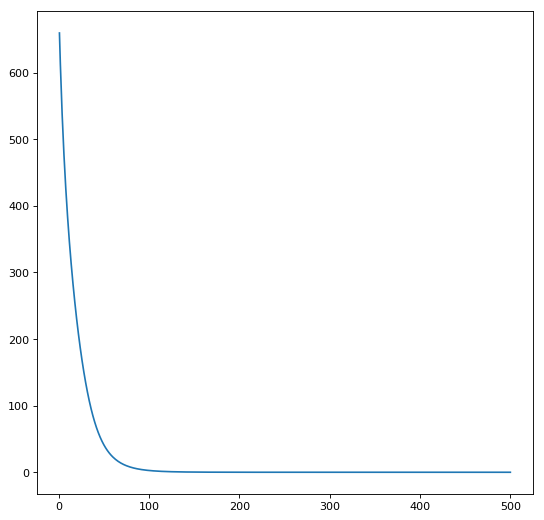

In [133]:
x = np.linspace(1, 500, 500)

y = loss_arr

fig = plt.figure(figsize=(8,8), dpi = 80)
plt.plot(x, y)
plt.show()


# Using Optimizer to update parameters

In [134]:
import torch
from torch.autograd import Variable
import numpy as np

%matplotlib inline

loss_arr = []

dtype = torch.FloatTensor

N, D_in, D_out, H = 64, 1000, 10, 100

x = Variable(torch.randn(N, D_in).type(dtype), requires_grad = False)
y = Variable(torch.randn(N, D_out), requires_grad = False)

model = torch.nn.Sequential(torch.nn.Linear(D_in, H, bias = True),
                            torch.nn.ReLU(),
                            torch.nn.Linear(H, D_out, bias=True)
        )

loss_fn = torch.nn.MSELoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
for t in range(500):
    y_pred = model(x)
    
    loss = loss_fn(y_pred, y)
    #print(t, loss.data[0])
    loss_arr.append(loss.data[0])
    model.zero_grad()
    
    loss.backward()
    
    optimizer.step()

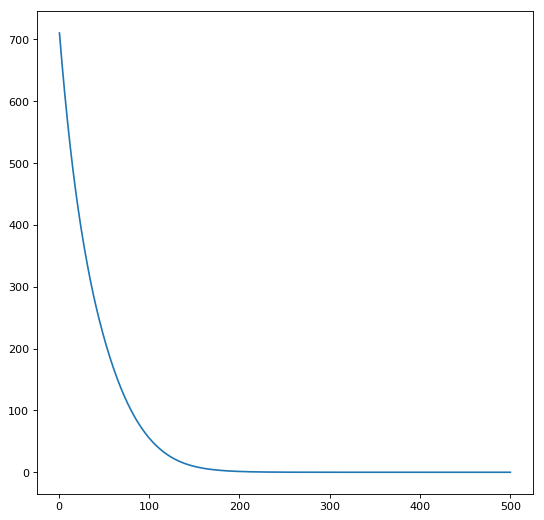

In [135]:
x = np.linspace(1, 500, 500)

y = loss_arr

plt.figure(figsize=(8,8), dpi = 80)
plt.plot(x, y)
plt.show()


# Construction of your own modules: Custom nn modules

1. Sometimes you need to construct your own model, but adding custom steps rather than using the existing ones in Modules. for this you need to subclass the existing nn.Module and define *forward* which takes input Variable and produces Output.



In [136]:
class TwoLayerNet(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        super(TwoLayerNet, self).__init__()
        self.Linear1 = torch.nn.Linear(D_in, H)
        self.Linear2 = torch.nn.Linear(H, D_out)
        
    def forward(self, x):
        h_relu = self.Linear1(x).clamp(min = 0)
        y_pred = self.Linear2(h_relu)
        return y_pred

N, D_in, D_out, H = 64, 1000, 10, 100

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad = False)

model = TwoLayerNet(D_in, H, D_out)
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)
for i in range(1000):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    
    
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()
print(i, loss.data[0])

999 2.8639357552151523e-09


# Dynamic net & Weight sharing:

In this model, we implement a dynamic network, that chooses the number of hidden layers dynamically for every run. For each run, the same weights are used for the hidden layer updates.

In [137]:
import random

class DynamicNet(torch.nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(DynamicNet, self).__init__()
        self.inputLinear = torch.nn.Linear(D_in, H)
        self.middleLinear = torch.nn.Linear(H, H)
        self.outputLinear = torch.nn.Linear(H, D_out)
    
    def forward(self, x):
        h_relu = self.inputLinear(x).clamp(min=0)
        for i in range(random.randint(0,3)):
            h_relu = self.middleLinear(h_relu).clamp(min = 0)
        y_pred = self.outputLinear(h_relu)
        return y_pred
    
N, D_in, D_out, H = 64, 1000, 10, 100

x = Variable(torch.randn(N, D_in))
y = Variable(torch.randn(N, D_out), requires_grad = False)

model = DynamicNet(D_in, H, D_out)
criterion = torch.nn.MSELoss(size_average=False)
optimizer = torch.optim.SGD(model.parameters(), lr = 1e-4)

for t in range(500):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(t, loss)


499 Variable containing:
 4.1517
[torch.FloatTensor of size 1]

